In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
mydata = pd.read_csv('penguins_size.csv')

In [4]:
mydata.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
df = mydata.copy()

In [9]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [10]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [14]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [15]:
df.shape

(344, 7)

In [25]:
numerical_cols = [feature for feature in df.columns if df[feature].dtype == 'O']

In [26]:
numerical_cols

['species', 'island', 'sex']

In [28]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype != 'O']

In [29]:
categorical_cols

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [30]:
df.duplicated().sum()

0

In [34]:
df.corr(numeric_only = True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: >

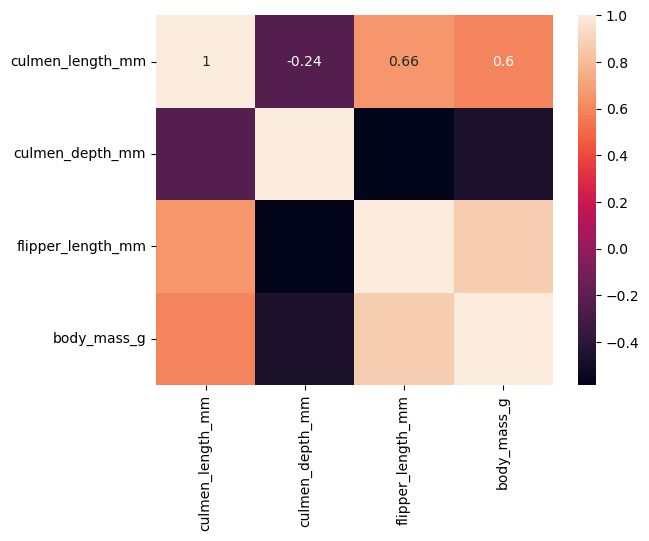

In [40]:
sns.heatmap(data = df.corr(numeric_only = True), annot = True)

In [42]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## UNIVARIATE ANALYSIS

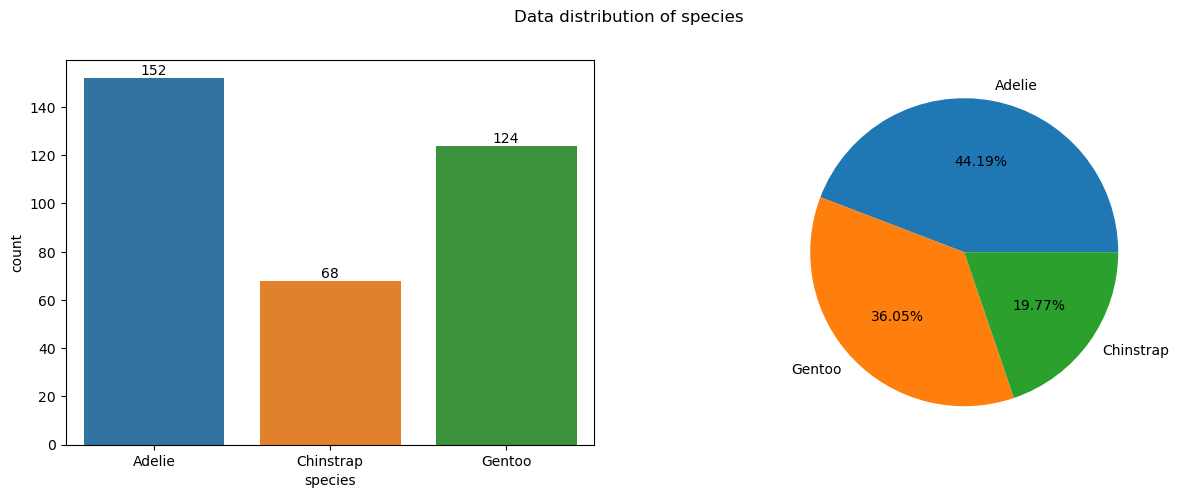

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Data distribution of species')
plt.subplot(121)
sns.countplot(data = df, x= 'species')
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 10)

plt.subplot(122)
plt.pie(x = df.species.value_counts(), labels = ['Adelie', 'Gentoo', 'Chinstrap'], autopct = '%.2f%%')

plt.show()

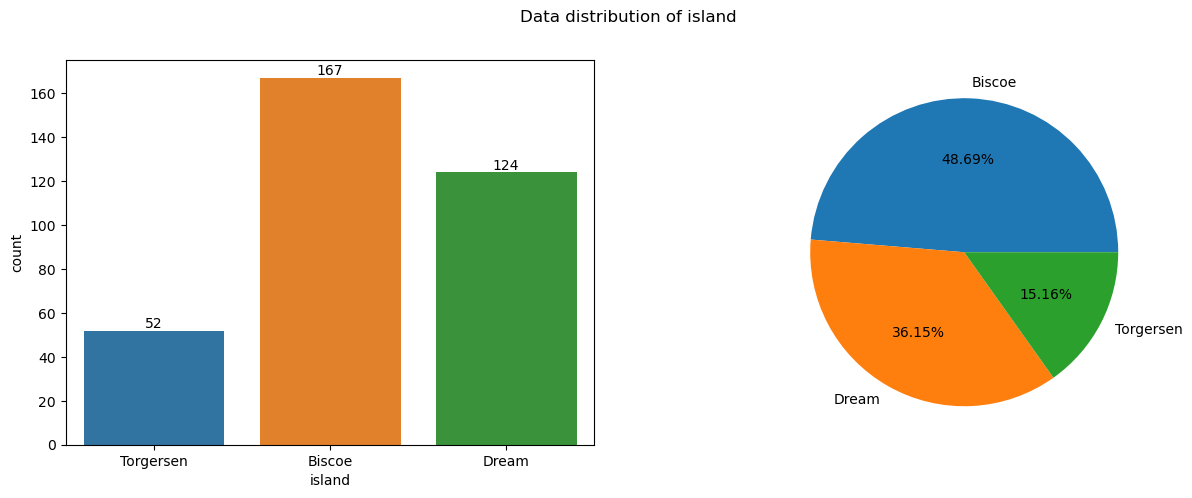

In [100]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Data distribution of island')
plt.subplot(121)
sns.countplot(data = df, x= 'island')
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 10)

plt.subplot(122)
plt.pie(x = df.island.value_counts(), labels = ['Biscoe', 'Dream', 'Torgersen'], autopct = '%.2f%%')

plt.show()

In [92]:
df.iloc[336]

In [93]:
df.drop(index = 336, axis = 0, inplace = True)

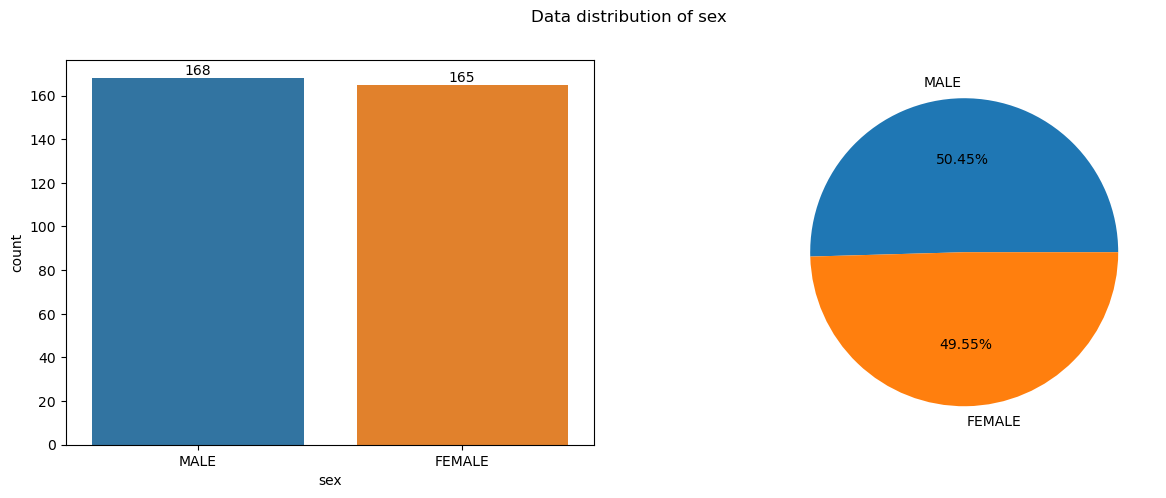

In [99]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Data distribution of sex')
plt.subplot(121)
sns.countplot(data = df, x= 'sex')
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 10)

plt.subplot(122)
plt.pie(x = df.sex.value_counts(), labels = ['MALE', 'FEMALE'], autopct = '%.2f%%')

plt.show()

In [95]:
df.sex.value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [96]:
df.shape

(343, 7)

In [98]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [106]:
import warnings
warnings.filterwarnings('ignore')

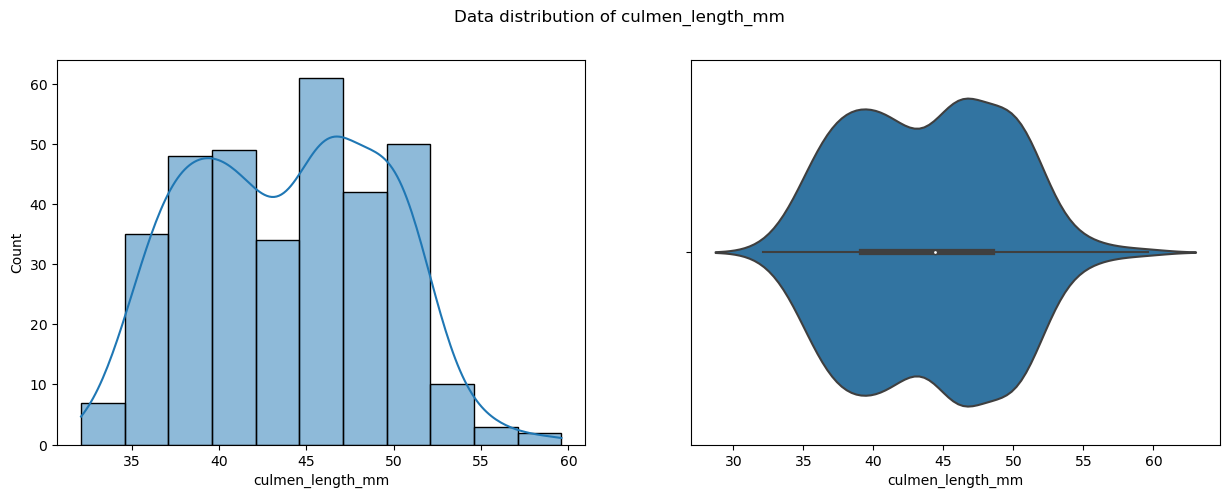

In [108]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Data distribution of culmen_length_mm')
plt.subplot(121)
sns.histplot(data = df, x= 'culmen_length_mm', kde = True)


plt.subplot(122)
sns.violinplot(data = df, x = 'culmen_length_mm')

plt.show()

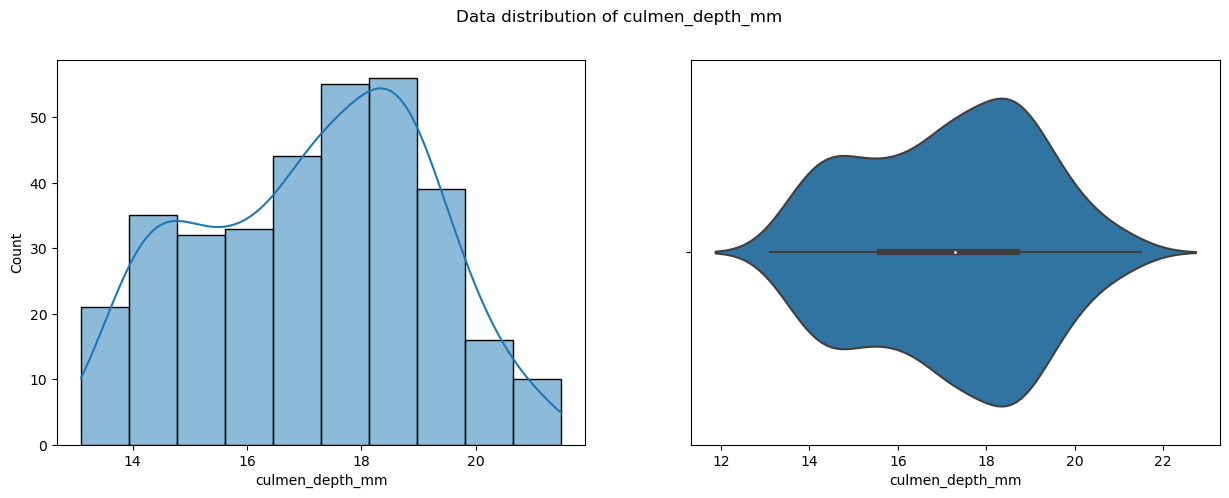

In [112]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Data distribution of culmen_depth_mm')
plt.subplot(121)
sns.histplot(data = df, x= 'culmen_depth_mm', kde = True)


plt.subplot(122)
sns.violinplot(data = df, x = 'culmen_depth_mm')

plt.show()

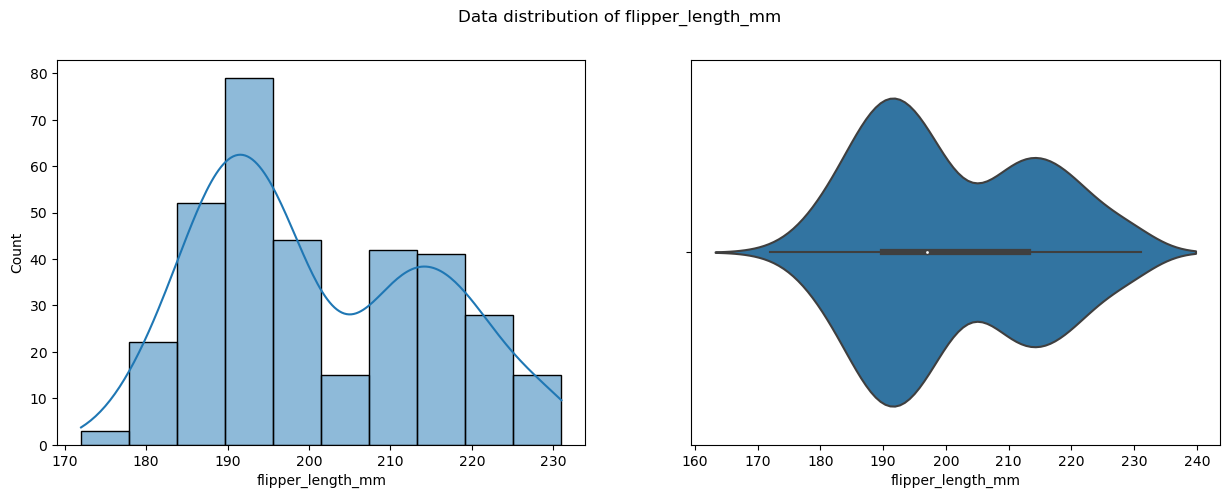

In [115]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Data distribution of flipper_length_mm')
plt.subplot(121)
sns.histplot(data = df, x= 'flipper_length_mm', kde = True)


plt.subplot(122)
sns.violinplot(data = df, x = 'flipper_length_mm')

plt.show()

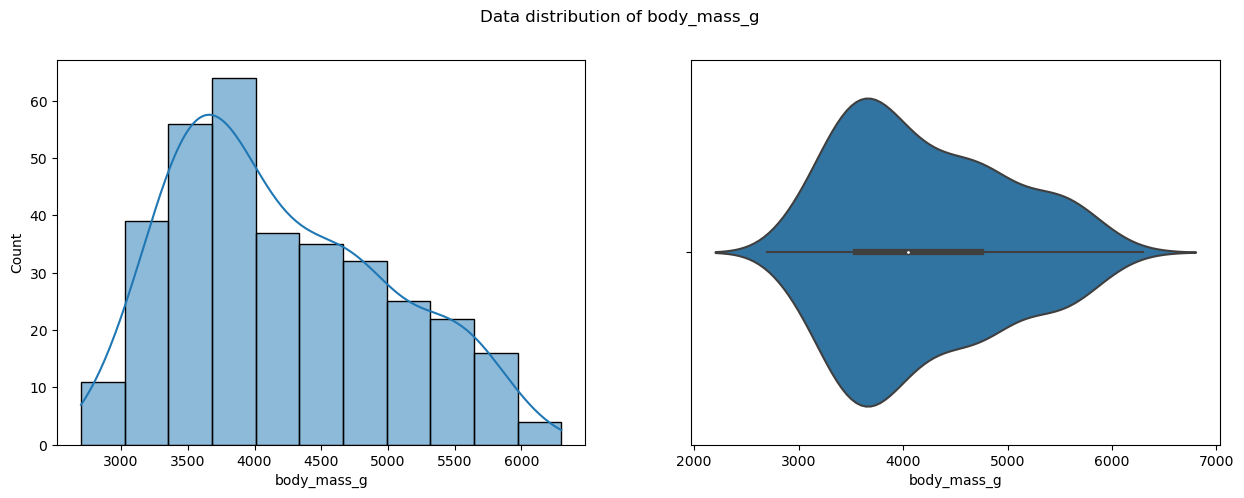

In [116]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Data distribution of body_mass_g')
plt.subplot(121)
sns.histplot(data = df, x= 'body_mass_g', kde = True)


plt.subplot(122)
sns.violinplot(data = df, x = 'body_mass_g')

plt.show()

## BIVARIATE ANALYSIS

In [117]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [124]:
grouped_data = df.groupby(by = 'species').mean(numeric_only = True)

In [125]:
grouped_data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.529508,14.976230,217.188525,5077.663934


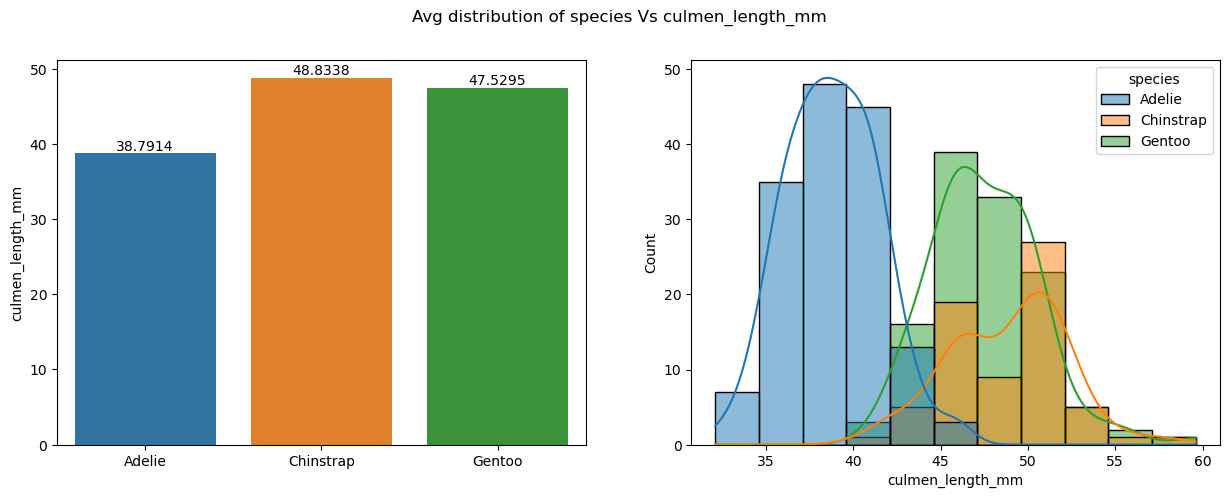

In [149]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Avg distribution of species Vs culmen_length_mm')
plt.subplot(121)
sns.barplot(x = ['Adelie', 'Chinstrap', 'Gentoo'], y = grouped_data.culmen_length_mm)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 10)

plt.subplot(122)
sns.histplot(data =df , x = 'culmen_length_mm' , hue = 'species', kde = True)

plt.show()

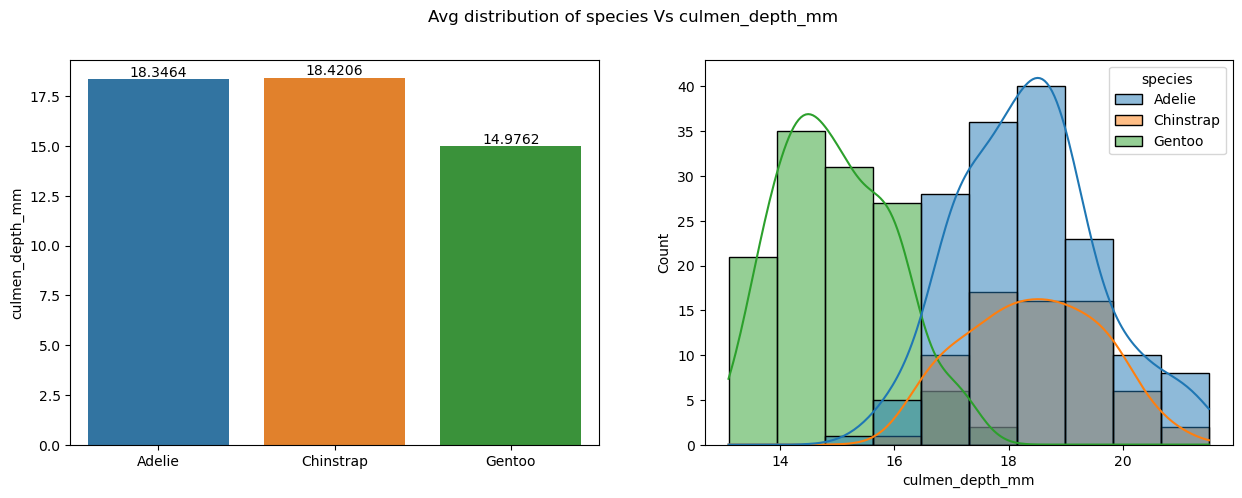

In [150]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Avg distribution of species Vs culmen_depth_mm')
plt.subplot(121)
sns.barplot(x = ['Adelie', 'Chinstrap', 'Gentoo'], y = grouped_data.culmen_depth_mm)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 10)

plt.subplot(122)
sns.histplot(data =df , x = 'culmen_depth_mm' , hue = 'species', kde = True)

plt.show()

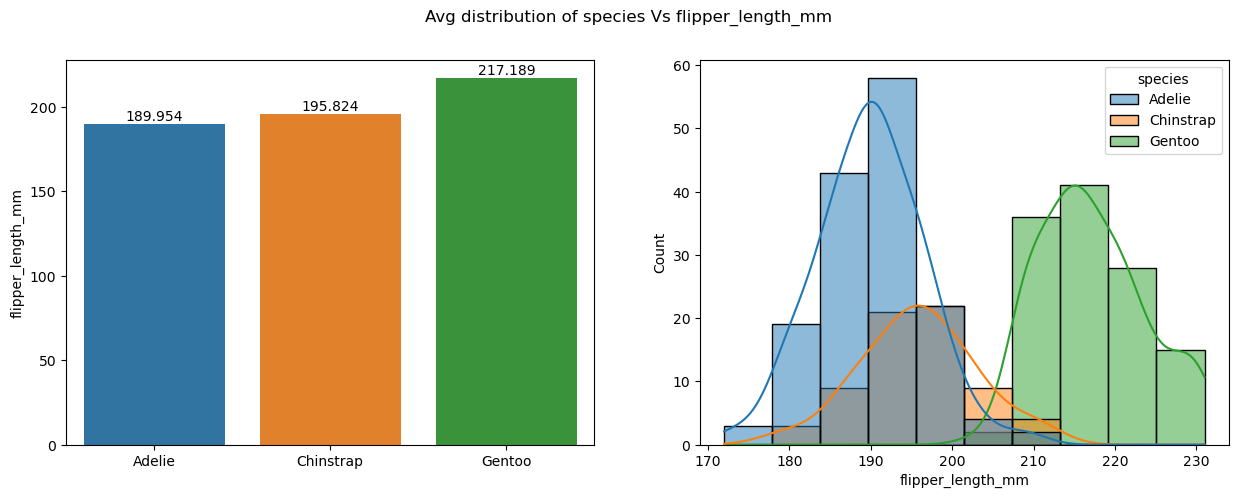

In [151]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Avg distribution of species Vs flipper_length_mm')
plt.subplot(121)
sns.barplot(x = ['Adelie', 'Chinstrap', 'Gentoo'], y = grouped_data.flipper_length_mm)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 10)

plt.subplot(122)
sns.histplot(data =df , x = 'flipper_length_mm' , hue = 'species', kde = True)

plt.show()

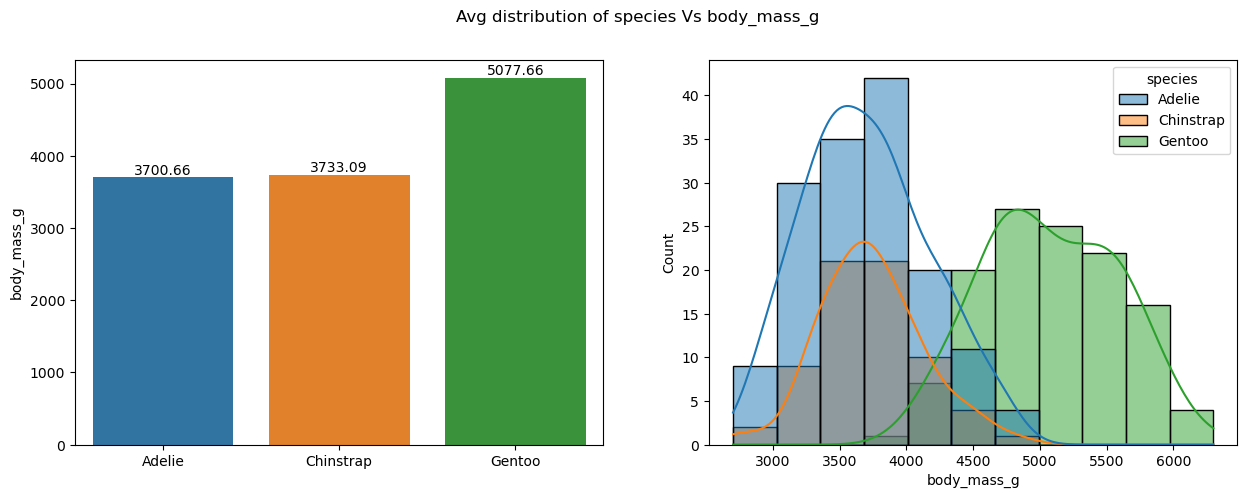

In [152]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Avg distribution of species Vs body_mass_g')
plt.subplot(121)
sns.barplot(x = ['Adelie', 'Chinstrap', 'Gentoo'], y = grouped_data.body_mass_g)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 10)

plt.subplot(122)
sns.histplot(data =df , x = 'body_mass_g' , hue = 'species', kde = True)

plt.show()

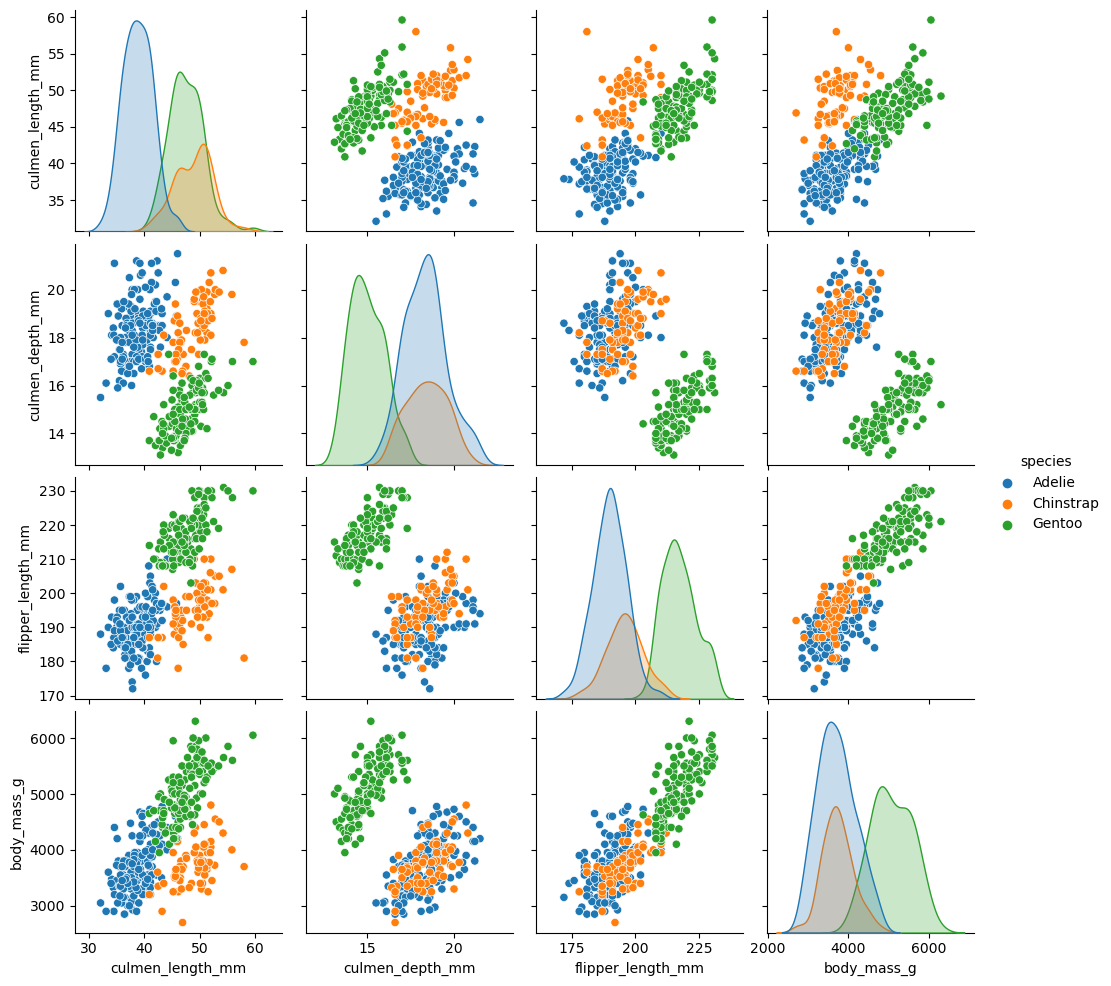

In [154]:
sns.pairplot(data = df, hue = 'species')